In [1]:
## data
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta

## viz
import matplotlib.pyplot as plt
import seaborn as sns

## model
import statsmodels.api as sm
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
PATH = "../Dados/Armarios/"
FILE = "base_serie_temporal.csv"

In [4]:
df = pd.read_csv(PATH + FILE, sep = '|')
df['mes'] = df['mes'].astype('string')
df['mes'] = df['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
df

,mes,macroregiao,uf,consumototal,valortotal,consumopontatotal,consumoforapontatotal,demandaconsumida
0,2017-01-01,CO,DF,197037.00,142995.97,0.0,197037.00,0.0
1,2017-01-01,CO,GO,481709.39,317902.59,0.0,481709.39,0.0
2,2017-01-01,CO,MS,177800.00,120142.91,0.0,177800.00,0.0
3,2017-01-01,CO,MT,123380.00,98882.99,0.0,123380.00,0.0
4,2017-01-01,NE,AL,68556.00,47076.41,0.0,68556.00,0.0
...,...,...,...,...,...,...,...,...
1218,2022-05-01,S,SC,281570.00,233974.63,1331.0,280239.00,0.0
1219,2022-05-01,SE,ES,209734.00,195998.85,2669.0,207065.00,0.0
1220,2022-05-01,SE,MG,364837.00,68521.01,0.0,364837.00,0.0
1221,2022-05-01,SE,RJ,287063.00,245393.67,793.0,286270.00,0.0


In [5]:
df_pb = df.loc[df['uf'] == 'PB']
df_pb

,mes,macroregiao,uf,consumototal,valortotal,consumopontatotal,consumoforapontatotal,demandaconsumida
7,2017-01-01,NE,PB,98842.23,100554.77,0.0,98842.23,0.0
25,2017-02-01,NE,PB,135539.00,94412.19,0.0,135539.00,0.0
43,2017-03-01,NE,PB,149864.00,109133.41,0.0,149864.00,0.0
61,2017-04-01,NE,PB,138541.00,94387.20,0.0,138541.00,0.0
79,2017-05-01,NE,PB,145059.00,100678.06,0.0,145059.00,0.0
...,...,...,...,...,...,...,...,...
1135,2022-01-01,NE,PB,89946.00,84210.28,0.0,89946.00,0.0
1154,2022-02-01,NE,PB,83749.00,91278.14,0.0,83749.00,0.0
1173,2022-03-01,NE,PB,87480.00,96827.69,0.0,87480.00,0.0
1192,2022-04-01,NE,PB,86398.00,94133.82,0.0,86398.00,0.0


In [6]:
df_pb = df_pb[['mes', 'consumototal']]
df_pb

,mes,consumototal
7,2017-01-01,98842.23
25,2017-02-01,135539.00
43,2017-03-01,149864.00
61,2017-04-01,138541.00
79,2017-05-01,145059.00
...,...,...
1135,2022-01-01,89946.00
1154,2022-02-01,83749.00
1173,2022-03-01,87480.00
1192,2022-04-01,86398.00


In [10]:
df_pb.reset_index(inplace=True)

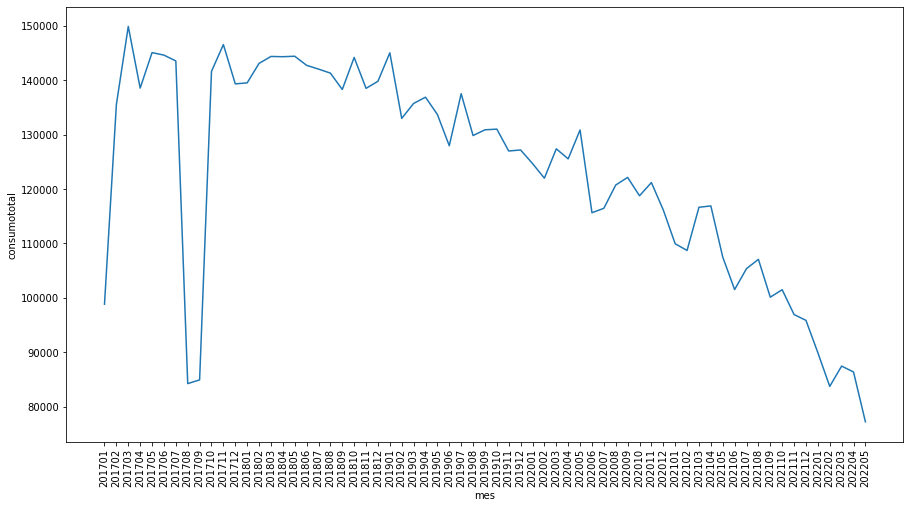

In [15]:
fig = plt.figure(figsize=(15,8))

sns.lineplot(data=df_pb, x=df_pb['mes'].dt.strftime('%Y%m'), y="consumototal")
plt.xticks(rotation=90)
plt.show()

In [16]:
df_plot = df_pb[['mes', 'consumototal']]
df_plot['mm'] = df_plot['consumototal'].rolling(window=6).mean()

df_plot.head(10)

,mes,consumototal,mm
0,2017-01-01,98842.23,NaN
1,2017-02-01,135539.00,NaN
2,2017-03-01,149864.00,NaN
3,2017-04-01,138541.00,NaN
4,2017-05-01,145059.00,NaN
5,2017-06-01,144595.00,135406.705000
6,2017-07-01,143524.00,142853.666667
7,2017-08-01,84263.00,134307.666667
8,2017-09-01,84944.00,123487.666667
9,2017-10-01,141617.00,124000.333333


<AxesSubplot:>

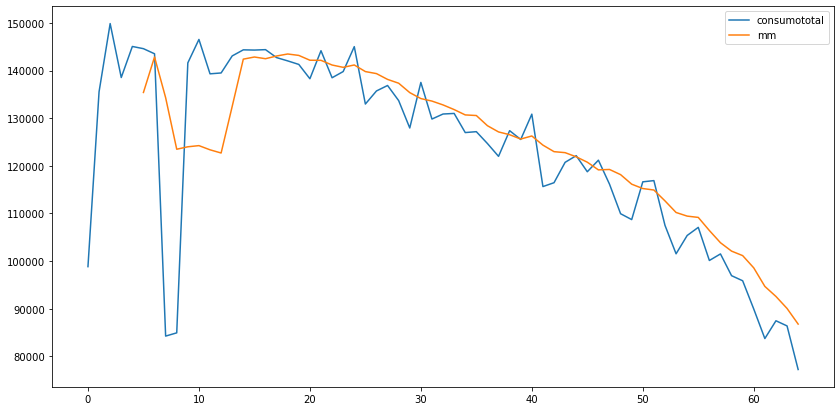

In [17]:
df_plot[['consumototal', 'mm']].plot(figsize=(14, 7))

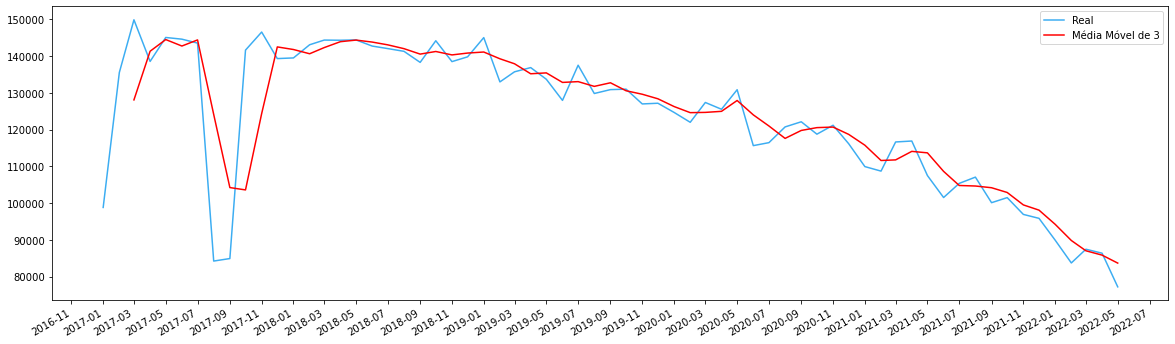

In [19]:
fig = plt.figure(figsize=(20, 6))

x = df_plot['mes']
y = df_plot['consumototal']
mm3 = df_plot['consumototal'].rolling(3).mean()
plt.plot(x, y, label='Real', color='#3CADF2')
plt.plot(x, mm3, label='Média Móvel de 3', color='red')

plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gcf().autofmt_xdate()

In [20]:
decompose = df_pb[df_pb['consumototal'] > 0].set_index('mes')
decompose

,consumototal
mes,
2017-01-01,98842.23
2017-02-01,135539.00
2017-03-01,149864.00
2017-04-01,138541.00
2017-05-01,145059.00
...,...
2022-01-01,89946.00
2022-02-01,83749.00
2022-03-01,87480.00


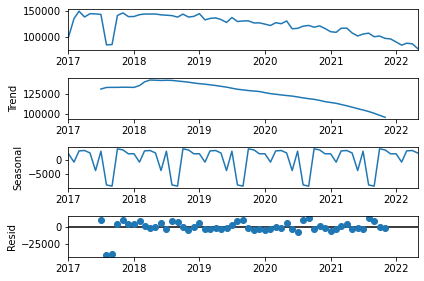

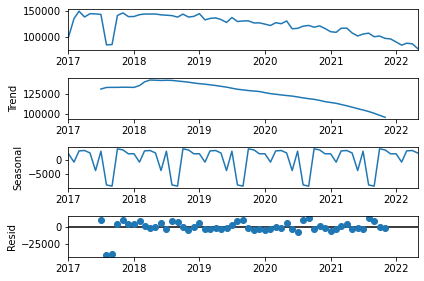

In [23]:
decompose_data = seasonal_decompose(decompose, model="additive")
decompose_data.plot()

<AxesSubplot:xlabel='mes'>

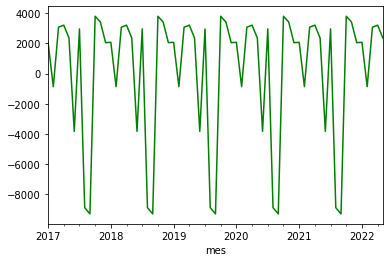

In [24]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [25]:
dftest = adfuller(decompose, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.6497949342510743
2. P-Value :  0.8593288985098299
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 62
5. Critical Values :
	 1% :  -3.540522678829176
	 5% :  -2.9094272025108254
	 10% :  -2.5923136524453696


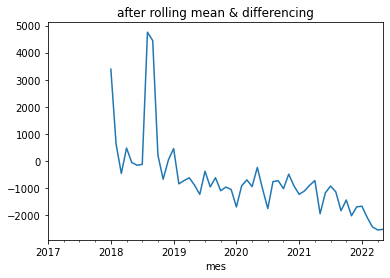

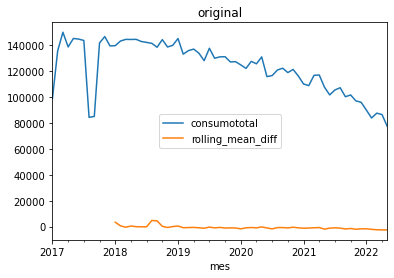

In [26]:
rolling_mean = decompose['consumototal'].rolling(window = 12).mean()
decompose['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
decompose['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
decompose.plot(title='original');

In [27]:
dftest = adfuller(decompose['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.6795729543004134
2. P-Value :  0.44166664107308445
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 49
5. Critical Values :
	 1% :  -3.5714715250448363
	 5% :  -2.922629480573571
	 10% :  -2.5993358475635153


In [31]:
temp = pd.DataFrame(pd.date_range(start='2022-06-01', periods=7, freq='M'), columns=['mes'])
temp['mes'] = pd.to_datetime(temp['mes'].dt.strftime('%Y-%m-01'))
temp['consumototal'] = np.nan

df = pd.concat([df_pb, temp]).reset_index(drop=True)
del temp
df

,mes,consumototal
0,2017-01-01,98842.23
1,2017-02-01,135539.00
2,2017-03-01,149864.00
3,2017-04-01,138541.00
4,2017-05-01,145059.00
...,...,...
67,2022-08-01,NaN
68,2022-09-01,NaN
69,2022-10-01,NaN
70,2022-11-01,NaN


In [45]:
dt_train_test = dt.datetime(2021, 7, 1)

xtrain = df[df['mes'] < dt_train_test]
xtest = df.loc[(df['mes'] >= dt_train_test) & (df['mes'] <= dt.datetime(2022, 12, 1))]

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_data = scaler.fit_transform(xtrain['consumototal'].values.reshape(-1, 1))
xtrain['consumototal'] = scaler_data

xtrain.head(3)

,mes,consumototal
0,2017-01-01,0.222241
1,2017-02-01,0.781634
2,2017-03-01,1.000000


In [47]:
print('Train interval: ', xtrain['mes'].min().date(), ' até ', xtrain['mes'].max().date())

Train interval:  2017-01-01  até  2021-06-01


In [48]:
print('Test interval: ', xtest['mes'].min().date(), ' até ', xtest['mes'].max().date())

Test interval:  2021-07-01  até  2022-12-01


In [49]:
interval_start = xtest.index.min()
interval_end = xtest.index.max()

print('Test interval: ', interval_start, ' até ', interval_end)

Test interval:  54  até  71


In [50]:
model = sm.tsa.statespace.SARIMAX(xtrain['consumototal'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

In [51]:
xtest['pred'] = model_fit.predict(start=interval_start, end=interval_end, dynamic=True)

In [52]:
scaler_data = scaler.inverse_transform(xtest['pred'].values.reshape(-1, 1))
xtest['pred'] = scaler_data

In [53]:
xtest

,mes,consumototal,pred
54,2021-07-01,105383.0,102262.778551
55,2021-08-01,107085.0,108056.888299
56,2021-09-01,100135.0,109627.008459
57,2021-10-01,101510.0,105316.478727
58,2021-11-01,96946.0,108218.761293
59,2021-12-01,95877.0,102858.150076
60,2022-01-01,89946.0,96238.833450
61,2022-02-01,83749.0,95111.984544
62,2022-03-01,87480.0,103283.492387
63,2022-04-01,86398.0,103675.615320


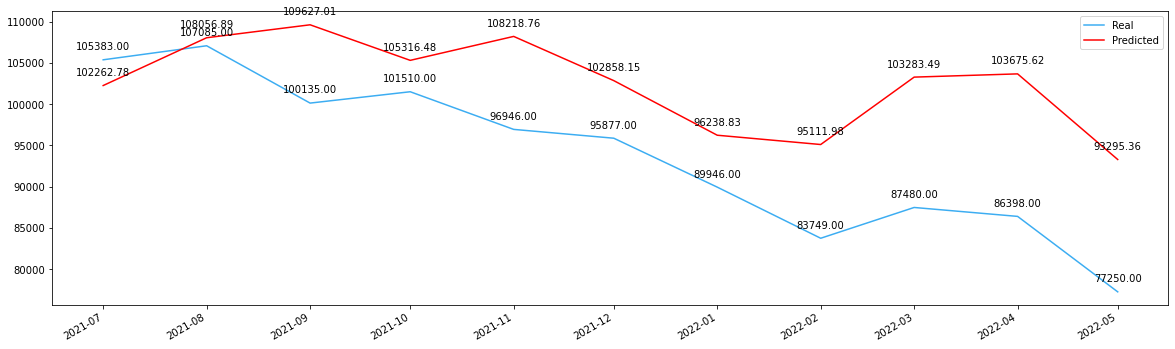

In [54]:
fig = plt.figure(figsize=(20, 6))

x = xtest[~xtest['consumototal'].isna()]['mes']
y = xtest[~xtest['consumototal'].isna()]['consumototal']
p = xtest[~xtest['consumototal'].isna()]['pred']
plt.plot(x, y, label='Real', color='#3CADF2')
plt.plot(x, p, label='Predicted', color='red')

for a, b in zip(x, y):
    plt.annotate("{:.2f}".format(b), (a, b), textcoords="offset points", xytext=(0,10), ha='center')

for a, b in zip(x, p):
    plt.annotate("{:.2f}".format(b), (a, b), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

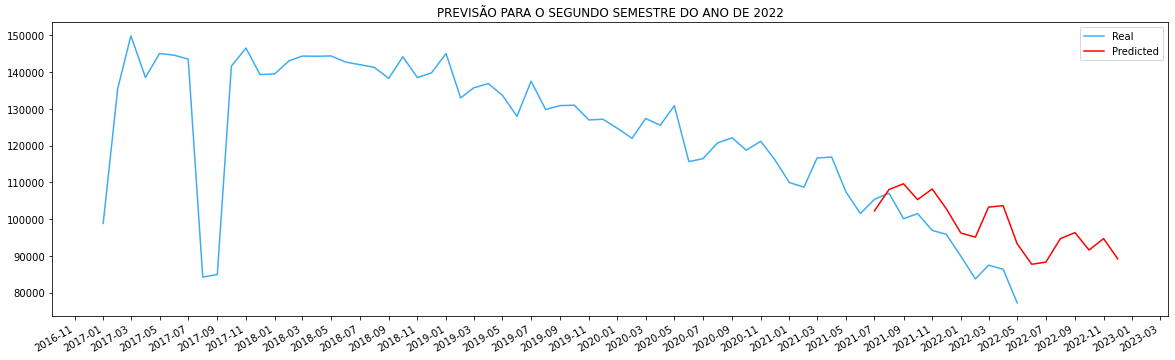

In [55]:
fig = plt.figure(figsize=(20, 6))

df_final = pd.concat([df[:interval_start], xtest])

x = df_final['mes'].dt.date
_real = df_final['consumototal']
_pred = df_final['pred']

plt.plot(x, _real, label='Real', color='#3CADF2')
plt.plot(x, _pred, label='Predicted', color='red')
plt.legend()
plt.title("PREVISÃO PARA O SEGUNDO SEMESTRE DO ANO DE 2022")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gcf().autofmt_xdate()

Text(0.5, 1.0, 'Forecast de Faturamento do Controle - NEXT')

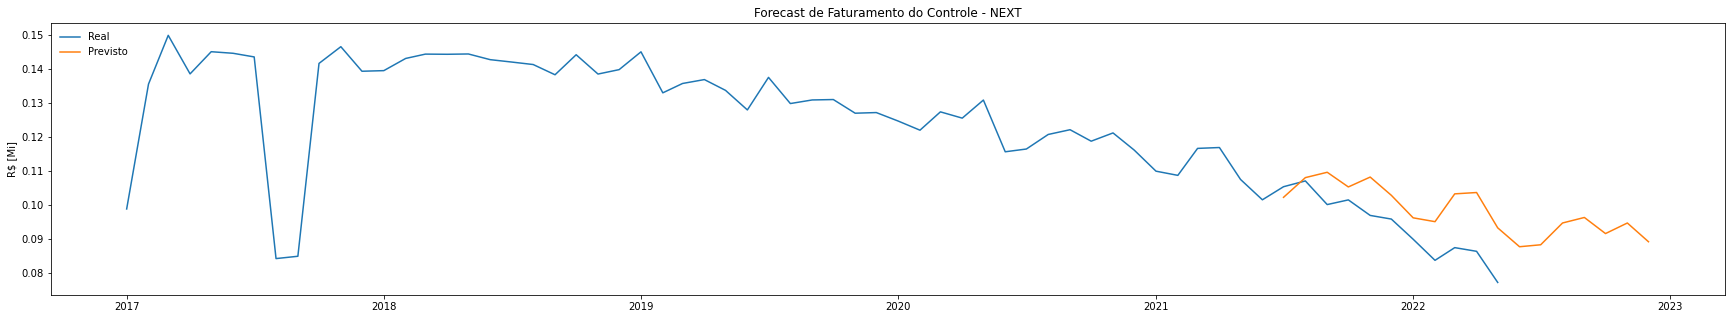

In [57]:
plt.figure(figsize=(30, 5))

ax = sns.lineplot(x=df_final['mes'], y=df_final.consumototal.div(1e6), label="Real")
ax = sns.lineplot(x=df_final['mes'], y=df_final.pred.div(1e6), label="Previsto")

plt.legend()
leg = plt.legend(loc = 2, ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)

plt.xlabel("")
plt.ylabel("R$ [Mi]")
#plt.ylim([50,400])
plt.title("Forecast de Faturamento do Controle - NEXT")

In [58]:
y_true = xtest[~xtest['consumototal'].isna()]['consumototal'].values
y_pred = xtest[~xtest['consumototal'].isna()]['pred'].values

In [59]:
# Mean Absolute Percentage Error & Root Mean Square Error
_mape = np.mean(np.abs((y_true - y_pred) / y_true )) * 100
_rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print('MAPE: {:.2f}, MSE: {:.2f}'.format(_mape, _rmse))

MAPE: 10.49, MSE: 10725.99


In [63]:
_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('MSE: {:.2f}Mil'.format(_rmse/1E3))

MSE: 10.73Mil
